Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages -------------------------------------------------------------------------------------- fpp2 2.4 --

v ggplot2   3.3.2     v fma       2.4  
v forecast  8.13      v expsmooth 2.3  





[1] 1

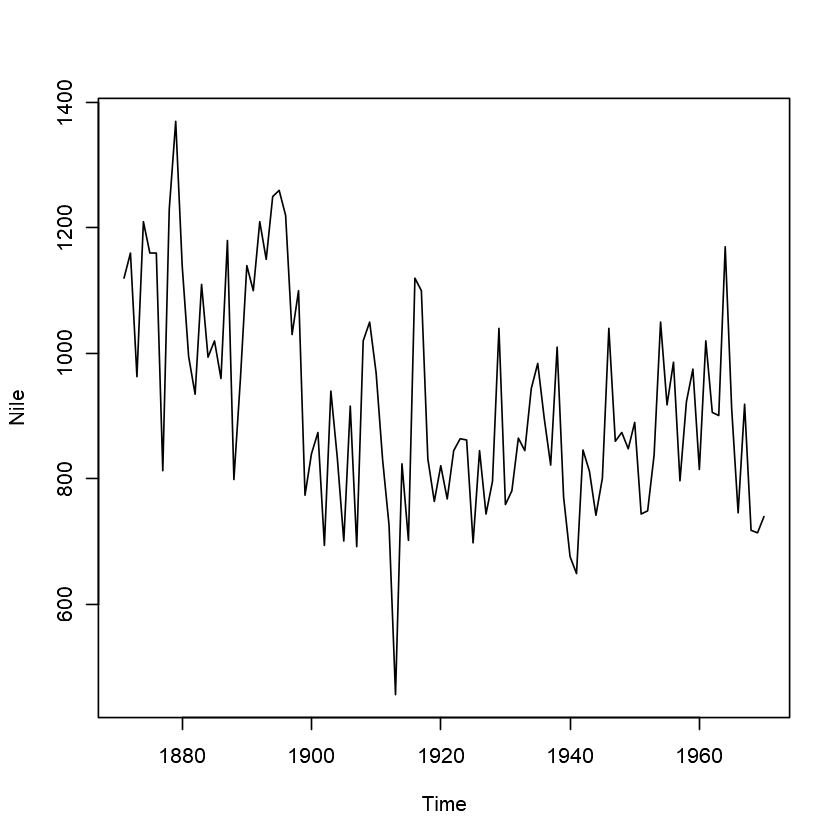

Warning message in adf.test(dNile):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  dNile
Dickey-Fuller = -6.5924, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


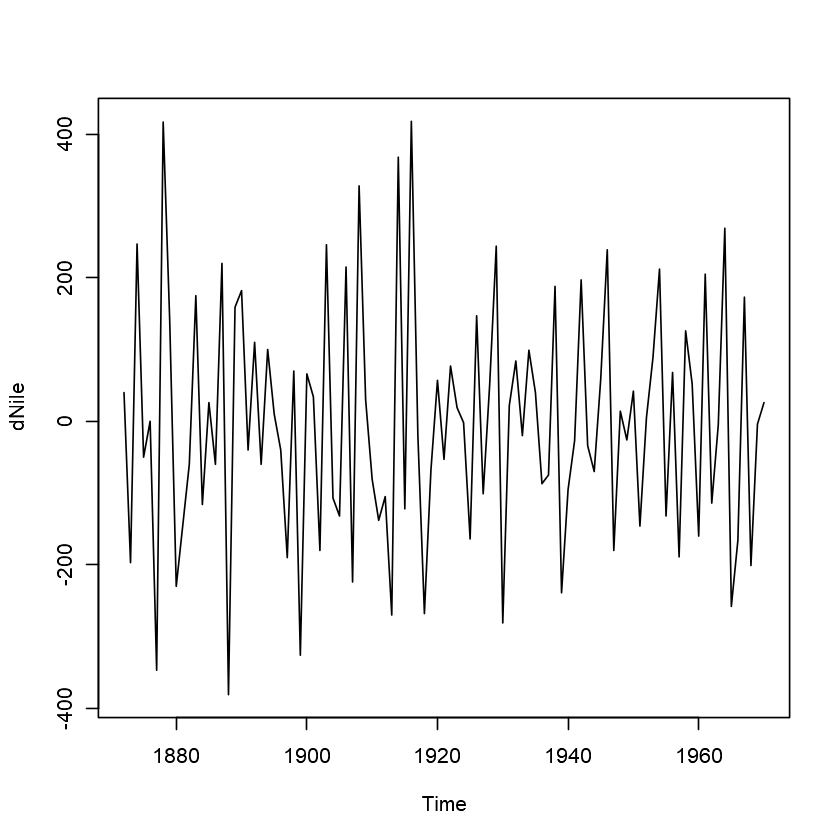

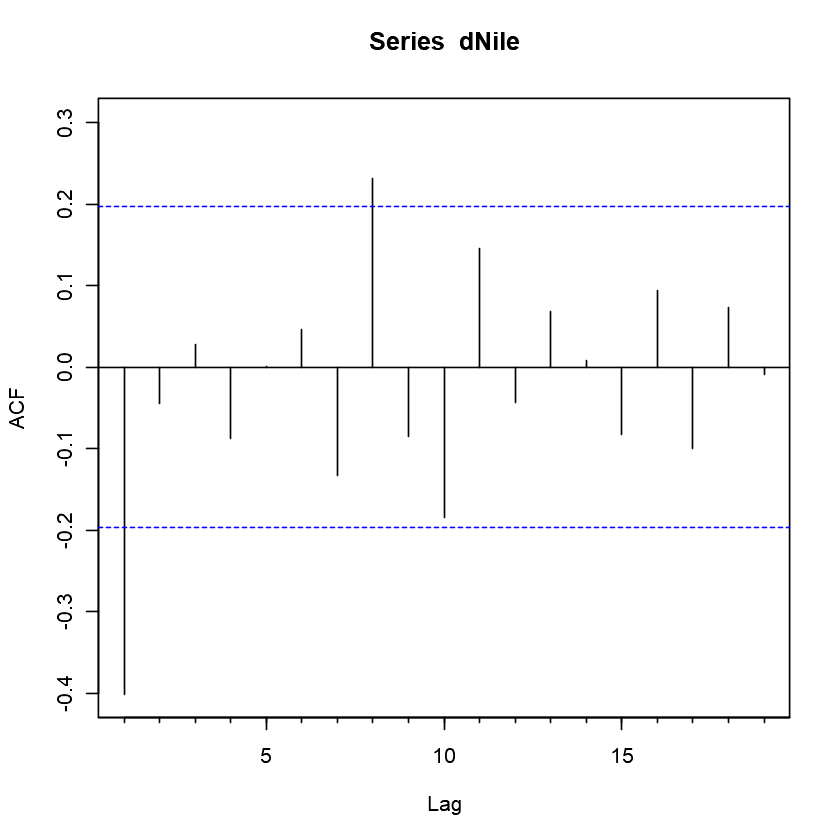


Call:
arima(x = Nile, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.7329
s.e.   0.1143

sigma^2 estimated as 20600:  log likelihood = -632.55,  aic = 1269.09

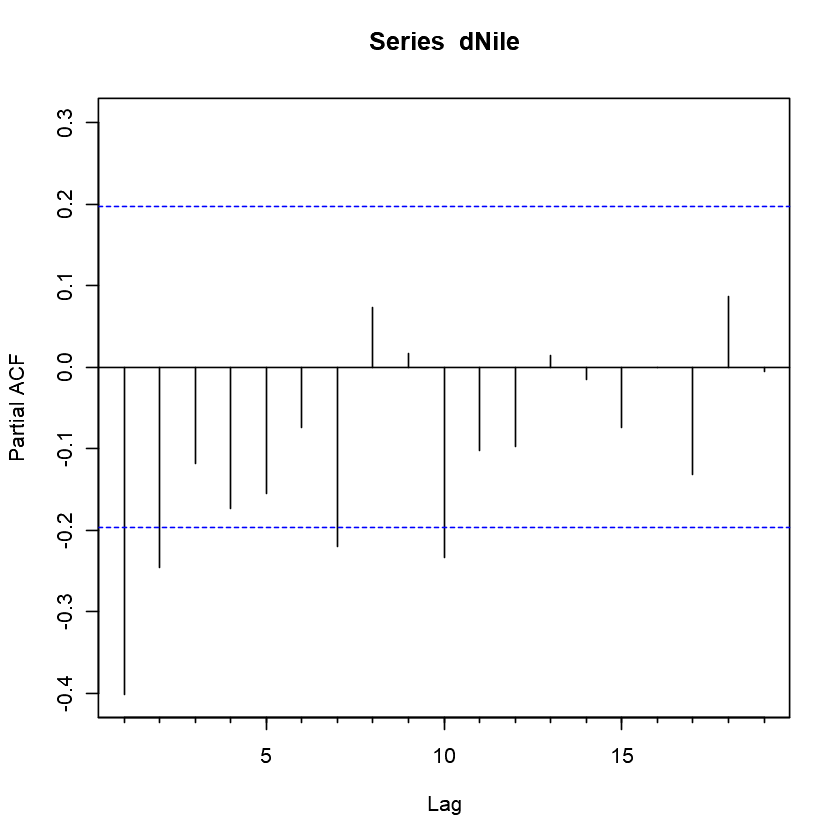


	Box-Ljung test

data:  fit$residuals
X-squared = 1.3711, df = 1, p-value = 0.2416


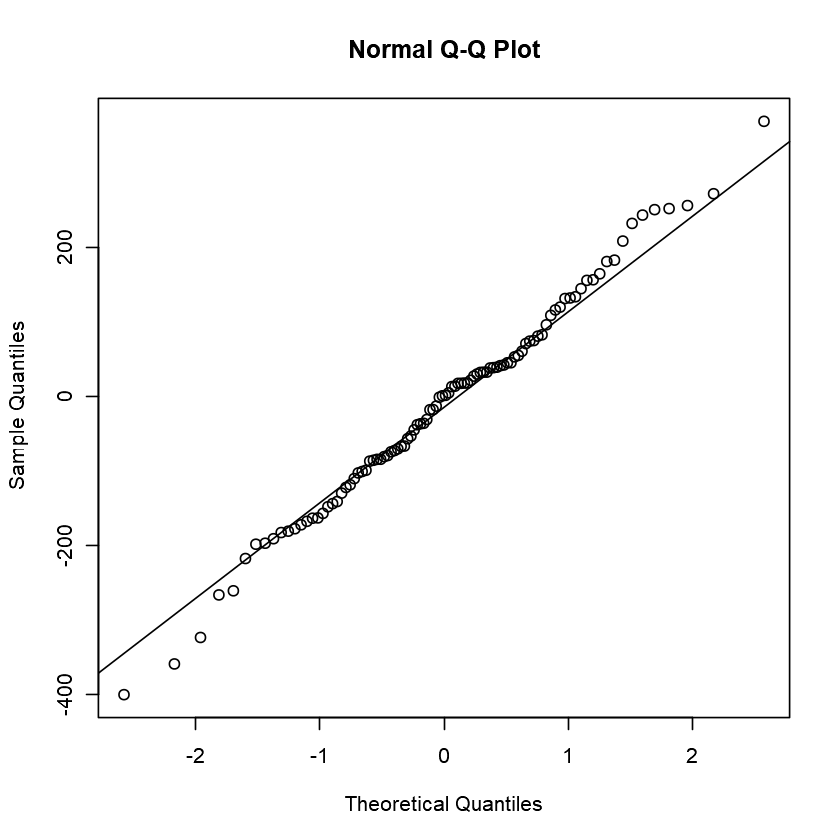


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 13.387, df = 9, p-value = 0.1458

Model df: 1.   Total lags used: 10



,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-11.9358,142.8071,112.1752,-3.574702,12.93594,0.841824,0.1153593


     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1971       798.3673 614.4307 982.3040 517.0605 1079.674
1972       798.3673 607.9845 988.7502 507.2019 1089.533
1973       798.3673 601.7495 994.9851 497.6663 1099.068

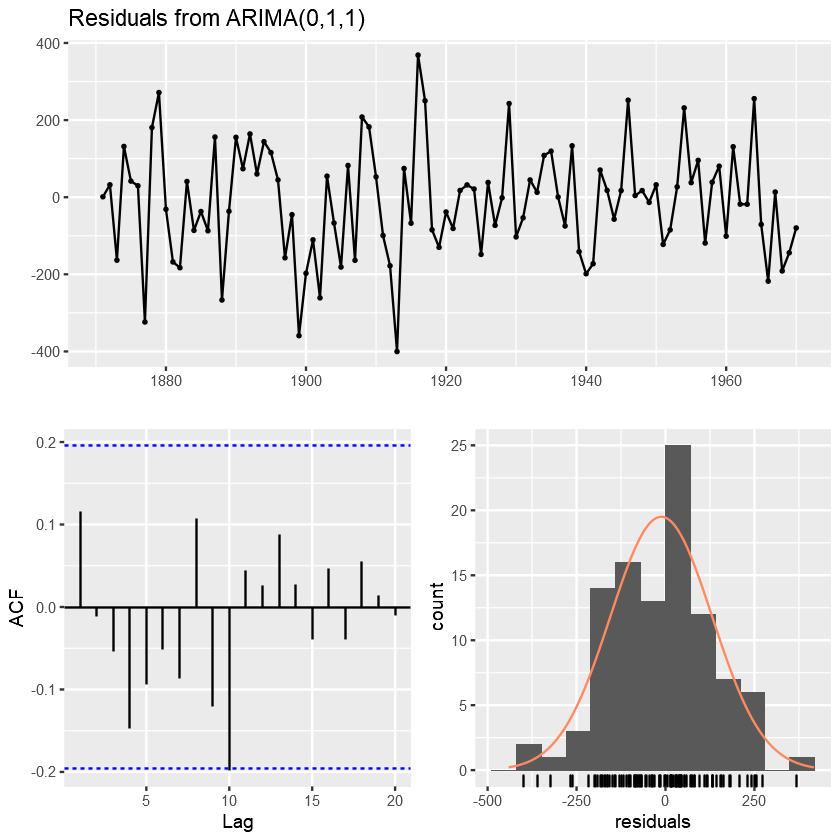

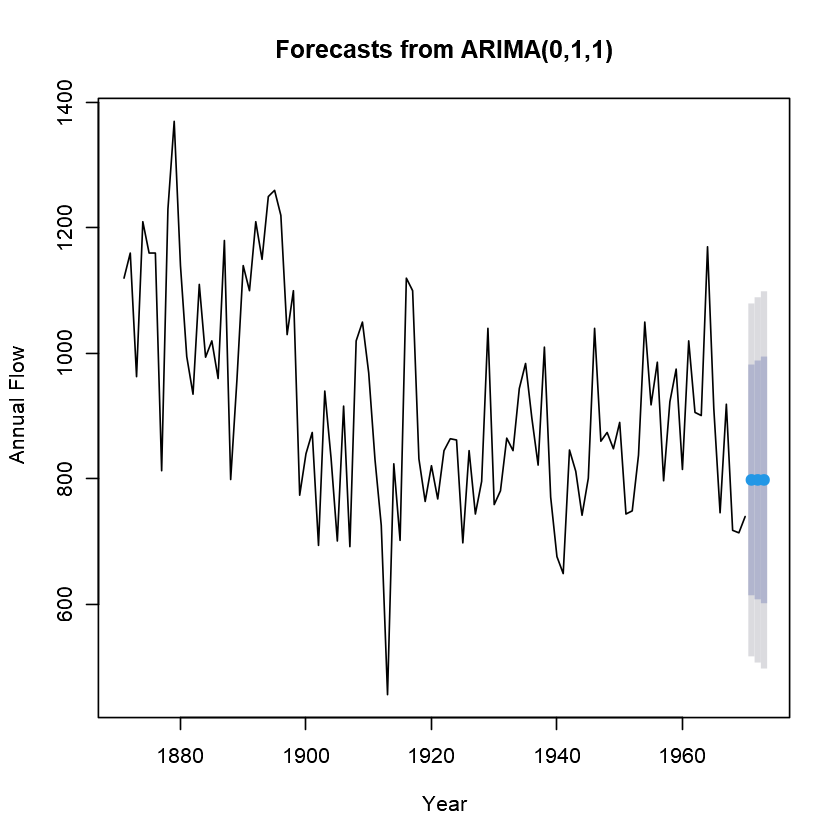

Series: sunspots 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      1.3467  -0.3963  -1.7710  0.8103
s.e.  0.0303   0.0287   0.0205  0.0194

sigma^2 estimated as 243.8:  log likelihood=-11745.5
AIC=23500.99   AICc=23501.01   BIC=23530.71

Series: Nile 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 estimated as 20177:  log likelihood=-630.63
AIC=1267.25   AICc=1267.51   BIC=1275.04

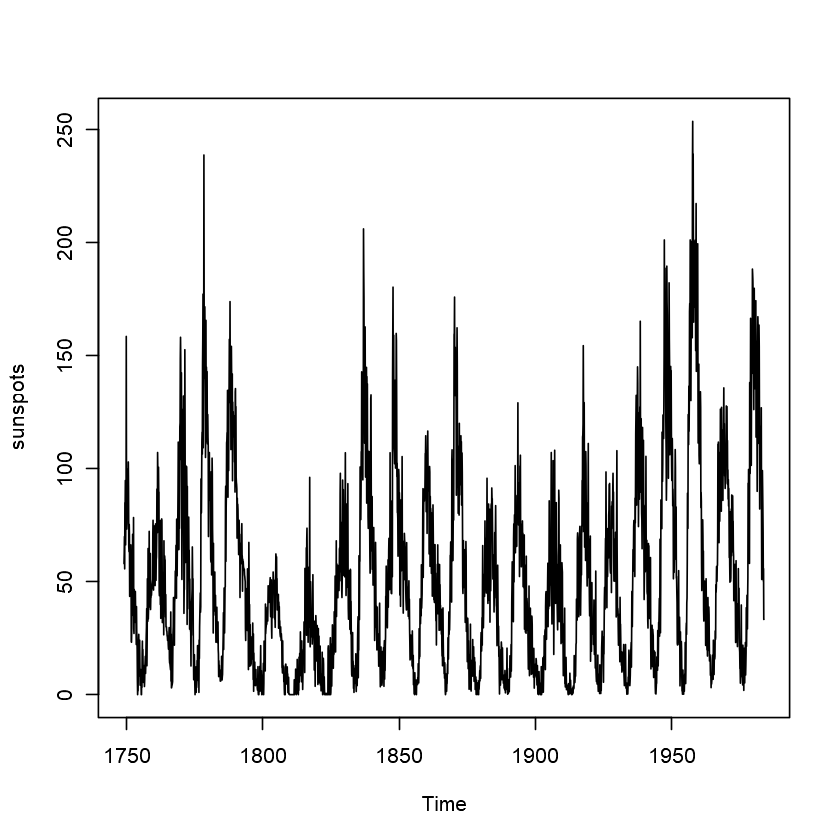

In [1]:
library(fpp2)
library(tseries)

#Plot the Nile Time Series
plot(Nile)

#Check the order of differencing required
ndiffs(Nile)

#Plot the differenced Nile Time Series
dNile <- diff(Nile)
plot(dNile)

#Assess stationarity of the differenced series
adf.test(dNile)

#ACF/PACF plots. Choosing p and q
Acf(dNile)
Pacf(dNile)

#Fitting an ARIMA model
fit <- arima(Nile, order=c(0,1,1))
fit

#Evaluating Model Fit
qqnorm(fit$residuals)
qqline(fit$residuals)
Box.test(fit$residuals, type="Ljung-Box")
checkresiduals(fit)
accuracy(fit)

#Forecasting with the fitted model
forecast(fit, 3)
plot(forecast(fit, 3), xlab="Year", ylab="Annual Flow")

#auto ARIMA function
plot(sunspots)
fit <- auto.arima(sunspots)
fit


fit.nile<-auto.arima(Nile)
fit.nile